In [1]:
!wget --no-check-certificate \
    https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip \
    -O /tmp/Chessman-image-dataset.zip

--2022-11-15 08:05:30--  https://github.com/dicodingacademy/assets/raw/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip [following]
--2022-11-15 08:05:30--  https://raw.githubusercontent.com/dicodingacademy/assets/main/ml_pengembangan_academy/Chessman-image-dataset.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60684125 (58M) [application/zip]
Saving to: ‘/tmp/Chessman-image-dataset.zip’

/tmp/Chessman-image 100%[===================>]  57.87M  --.-KB/s   

In [2]:
import os
import zipfile
local_zip = '/tmp/Chessman-image-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [3]:
root_dir = '/tmp/Chessman-image-dataset/Chess'
base_dir = os.listdir('/tmp/Chessman-image-dataset/Chess')
base_dir

['Bishop', 'Queen', 'Knight', 'Rook', 'King', 'Pawn']

In [4]:
for i in base_dir:
  print('total {} images: '.format(i)+str(len(os.listdir(root_dir+'/'+i))))

total Bishop images: 87
total Queen images: 78
total Knight images: 106
total Rook images: 102
total King images: 76
total Pawn images: 107


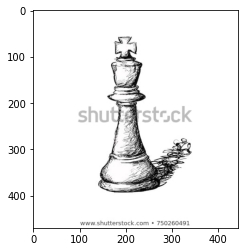

In [5]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
img = image.load_img('/tmp/Chessman-image-dataset/Chess/King/00000144.jpg')
imgplot = plt.imshow(img)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = os.path.join(root_dir)
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   fill_mode='nearest',
                                   validation_split=0.1)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=8,
    class_mode = 'categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=16,
    class_mode='categorical',
    subset='validation'
)

Found 499 images belonging to 6 classes.
Found 52 images belonging to 6 classes.


In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet152V2, ResNet50

model = Sequential([
    ResNet152V2(weights='imagenet', include_top=False, input_tensor=Input(shape=(150,150,3))),

    Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.layers[0].trainable = False

In [15]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [16]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=50,
                    verbose=2)

Epoch 1/50
63/63 - 24s - loss: 7.8234 - accuracy: 0.4369 - val_loss: 1.7955 - val_accuracy: 0.6346 - 24s/epoch - 375ms/step
Epoch 2/50
63/63 - 10s - loss: 1.9006 - accuracy: 0.6794 - val_loss: 1.6778 - val_accuracy: 0.6923 - 10s/epoch - 162ms/step
Epoch 3/50
63/63 - 10s - loss: 1.1652 - accuracy: 0.7675 - val_loss: 1.4829 - val_accuracy: 0.7308 - 10s/epoch - 162ms/step
Epoch 4/50
63/63 - 10s - loss: 1.0657 - accuracy: 0.7695 - val_loss: 1.0386 - val_accuracy: 0.7308 - 10s/epoch - 160ms/step
Epoch 5/50
63/63 - 10s - loss: 0.8629 - accuracy: 0.8096 - val_loss: 1.7141 - val_accuracy: 0.7885 - 10s/epoch - 162ms/step
Epoch 6/50
63/63 - 10s - loss: 0.8726 - accuracy: 0.8156 - val_loss: 1.6706 - val_accuracy: 0.6731 - 10s/epoch - 163ms/step
Epoch 7/50
63/63 - 11s - loss: 0.5419 - accuracy: 0.8617 - val_loss: 1.4923 - val_accuracy: 0.7692 - 11s/epoch - 179ms/step
Epoch 8/50
63/63 - 10s - loss: 0.6144 - accuracy: 0.8617 - val_loss: 0.7095 - val_accuracy: 0.7692 - 10s/epoch - 164ms/step
Epoch 9/

In [ ]:
print(history.history.keys())

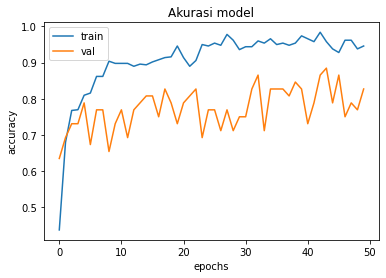

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi model')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

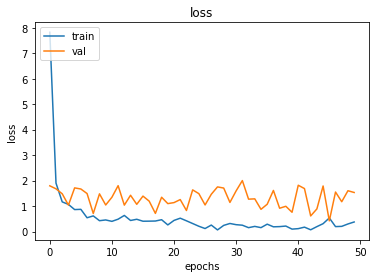

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()